In [2]:
from numpy import array  
from numpy.linalg import norm 

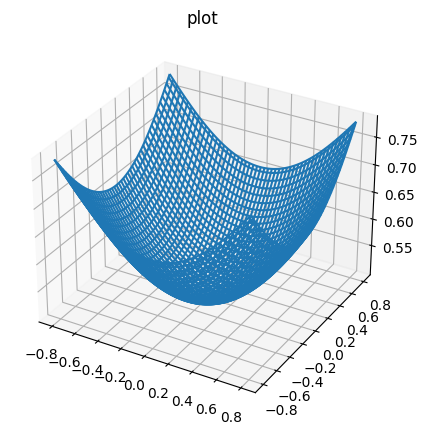

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(8, 5), 
                        subplot_kw={'projection': '3d'})

alpha = 0.8
r = np.linspace(-alpha,alpha,100)
X,Y= np.meshgrid(r,r)
l = 1./(1+np.exp(-(X**2+Y**2)))

ax1.plot_wireframe(X,Y,l)
ax1.set_title("plot")

plt.show()

In [146]:
import random
X0 = np.asarray([random.choice(X[0]),random.choice(Y)[0]])
X0 = np.array([-0.75,0.75])

In [150]:
def PGD(x0, alpha=0.01, iteration=200):
    x = x0.copy()
    optimal = 1./(1+np.exp(-(0+0)))
    loss = []
    x_list = []
    for _ in range(iteration):

        pred = 1./(1+np.exp(-(x[0]**2+x[1]**2)))
        error = 1/2 * (pred-optimal)**2
        loss.append(error)

        grad_x1 =  (2*x[0]*np.exp(-(x[0]**2+x[1]**2))/(np.exp((-x[0]**2)-(x[1]**2))+1)**2)
        grad_x2 =  (2*x[1]*np.exp(-(x[1]**2+x[0]**2))/(np.exp((-x[1]**2)-(x[0]**2))+1)**2)
        grad=np.asarray([grad_x1,grad_x2])
        #update
        y = x - alpha*grad
        #projection
        x = y * 1/max(norm(y,2),1)
        x_list.append(x)


        
    return x, loss, x_list

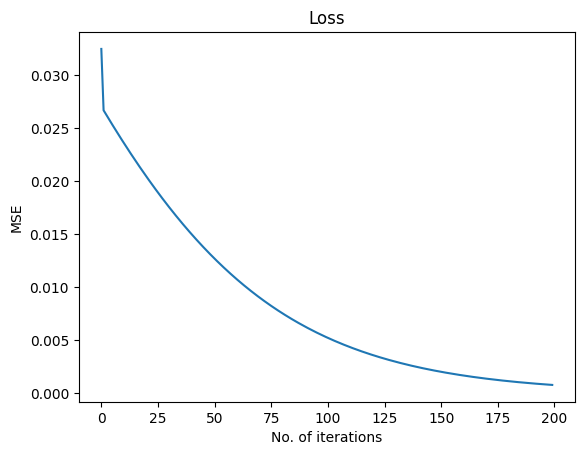

In [151]:
vector, loss, x_list = PGD(X0)
plt.plot(loss, label='Projected Gradient')
plt.title('Loss')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
#plt.legend()
plt.show()

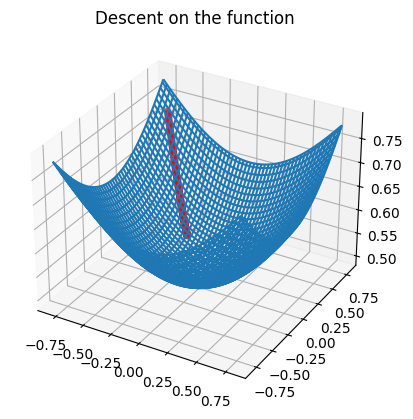

In [152]:
from matplotlib.pyplot import figure

x=[]
y=[]
z=[]
for el in x_list:
    x.append(el[0])
    y.append(el[1])
    z.append(1./(1+np.exp(-(el[0]**2+el[1]**2))))
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting

ax.plot_wireframe(X,Y,l)
#ax.plot3D(x, y, z, 'red')
ax.scatter(x, y, z, c='r')
ax.set_title('Descent on the function')
plt.show()

In [6]:
x= np.asarray([0.5,0.5])
grad_x1 =  (2*x[0]*np.exp(-(x[0]**2+x[1]**2))/(np.exp((-x[0]**2)-(x[1]**2))+1)**2)
grad_x2 =  (2*x[1]*np.exp(-(x[1]**2+x[0]**2))/(np.exp((-x[1]**2)-(x[0]**2))+1)**2)
grad=np.asarray([grad_x1,grad_x2])
pred = 1./(1+np.exp(-(x[0]**2+x[1]**2)))
s = [[0.8,0.8],[-0.8,0.8],[0.8,-0.8],[-0.8,-0.8]]
for el in s:
    pred + grad.dot(el-x)

In [101]:
-np.sign(np.ones(2))

array([-1., -1.])

In [130]:
def argmin_s(pred,grad,x,R):
    if R == 1 : 
        s = (-np.sign(grad))
        return s
    else:
        s = [[-np.sqrt(R**2/2),-np.sqrt(R**2/2)],[-np.sqrt(R**2/2),-np.sqrt(R**2/2)], [np.sqrt(R**2/2),-np.sqrt(R**2/2)], [np.sqrt(R**2/2),np.sqrt(R**2/2)]]
        tmp = []
        for el in s:
            tmp.append(pred + grad.dot(el-x))
        return s[np.argmin(tmp)]


def CGD(x0, alpha=0.001, iteration=100, R=1 , epsilon=10**-5):
    x = x0.copy()
    k=0
    losses = []
    opt= 1./(1+np.exp(-(0+0)))
    x_list = [x]
    for _ in range(200) :
        pred = 1./(1+np.exp(-(x[0]**2+x[1]**2)))
        error = 1/2 * (pred-opt)**2
        losses.append(error)

        grad_x1 =  (2*x[0]*np.exp(-(x[0]**2+x[1]**2))/(np.exp((-x[0]**2)-(x[1]**2))+1)**2)
        grad_x2 =  (2*x[1]*np.exp(-(x[1]**2+x[0]**2))/(np.exp((-x[1]**2)-(x[0]**2))+1)**2)
        grad=np.asarray([grad_x1,grad_x2])
        
        #s = np.asarray(argmin_s(pred,grad,x,R))
        s = np.asarray(argmin_s(pred,grad,x,R))
        if grad.dot(s-x)>=0-epsilon : 
            return x , losses
        teta = 2/(k+2)
        x = teta*s+(1-teta)*x
        k+=1
        x_list.append(x)
        #loss=1/2 * ([0,0]-x)**2
        #losses.append(np.log(loss))
        
    return x, losses, x_list
    

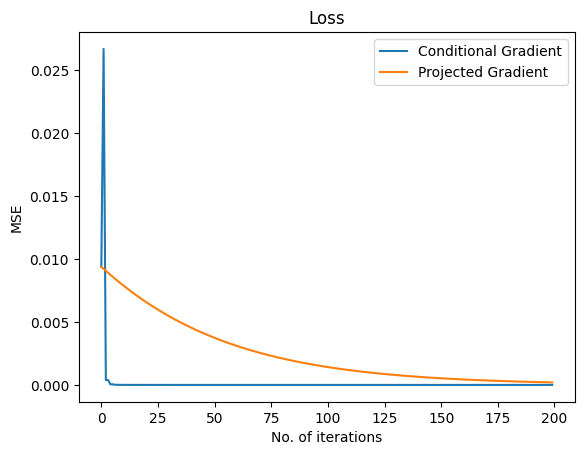

In [134]:
X0 = np.array([0,0.75])
vector, loss, x_list_coord = CGD(X0)
plt.plot(loss, label='Conditional Gradient')

X0 = np.array([0,0.75])
vector, loss, x_list_pgd = PGD(X0)
plt.plot(loss, label='Projected Gradient')
plt.title('Loss')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()

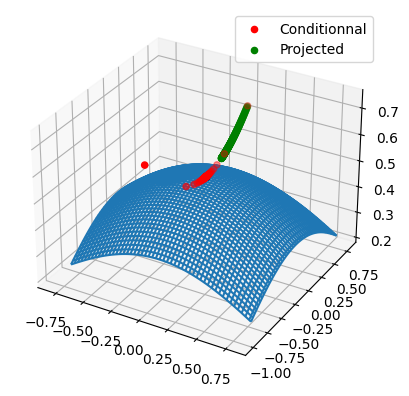

In [137]:
from matplotlib.pyplot import figure

x=[]
y=[]
z=[]
for el in x_list_coord:
    x.append(el[0])
    y.append(el[1])
    z.append(1./(1+np.exp(-(el[0]**2+el[1]**2))))
x1=[]
y1=[]
z1=[]
for el in x_list_pgd:
    x1.append(el[0])
    y1.append(el[1])
    z1.append(1./(1+np.exp(-(el[0]**2+el[1]**2))))

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# plotting
ax.scatter(x, y, z, c='r', label='Conditionnal')
ax.scatter(x1, y1, z1, c='green', label = 'Projected')
ax.plot_wireframe(X,Y,-l+1)


#ax.set_title('Descent of both algo, on the inversed of the function')
plt.legend()
plt.show()

### Question 2: the simplex (see the reference to Laurent Condat’s paper in the notes, you may choose any method described therein), or the l1-ball, or some other exotic convex set of your choice (see the paper by Jaggi in the notes for some ideas) 

I will try to implement the algo from page 3/11 to project onto the simplex.

In [95]:
#from the article page 3/11
def proj_simplex_using_sorting(x,a=1):
  #decreasing sort of x coefficients into u
  u_vect = np.sort(x,axis=None)
  u_vect = u_vect[::-1]
  
  cumulat_sum = np.cumsum(u_vect) - a 
  k = np.arange(u_vect.shape[0]) +1 #array containing all the ks (indices +1)
  cond = cumulat_sum/k - u_vect < 0
  K = k[cond][-1]
  tau = cumulat_sum[K-1]/(K)
  return np.where(x-tau>0,x-tau,0)

In [96]:
def PGD_simplex(x0, alpha=0.01, iteration=200):
    x = x0.copy()
    optimal = 1./(1+np.exp(-(0+0)))
    loss = []
    x_list = []
    for _ in range(iteration):

        pred = 1./(1+np.exp(-(x[0]**2+x[1]**2)))
        error = 1/2 * (pred-optimal)**2
        loss.append(error)

        grad_x1 =  (2*x[0]*np.exp(-(x[0]**2+x[1]**2))/(np.exp((-x[0]**2)-(x[1]**2))+1)**2)
        grad_x2 =  (2*x[1]*np.exp(-(x[1]**2+x[0]**2))/(np.exp((-x[1]**2)-(x[0]**2))+1)**2)
        grad=np.asarray([grad_x1,grad_x2])
        #update
        y = x - alpha*grad
        #projection
        x = proj_simplex_using_sorting(y,a=1)
        x_list.append(x)  
    return x, loss, x_list

In [ ]:
def argmin_s(pred,grad,x,R):
    if R == 1 : 
        s = (-np.sign(grad))
        return s
    else:
        s = [[-np.sqrt(R**2/2),-np.sqrt(R**2/2)],[-np.sqrt(R**2/2),-np.sqrt(R**2/2)], [np.sqrt(R**2/2),-np.sqrt(R**2/2)], [np.sqrt(R**2/2),np.sqrt(R**2/2)]]
        tmp = []
        for el in s:
            tmp.append(pred + grad.dot(el-x))
        return s[np.argmin(tmp)]

#not working
def CGD_simplex(x0, alpha=0.001, iteration=100, R=1 , epsilon=10**-5):
    x = x0.copy()
    k=0
    losses = []
    opt= 1./(1+np.exp(-(0+0)))
    x_list = [x]
    for _ in range(200) :
        pred = 1./(1+np.exp(-(x[0]**2+x[1]**2)))
        error = 1/2 * (pred-opt)**2
        losses.append(error)

        grad_x1 =  (2*x[0]*np.exp(-(x[0]**2+x[1]**2))/(np.exp((-x[0]**2)-(x[1]**2))+1)**2)
        grad_x2 =  (2*x[1]*np.exp(-(x[1]**2+x[0]**2))/(np.exp((-x[1]**2)-(x[0]**2))+1)**2)
        grad=np.asarray([grad_x1,grad_x2])
        
        #s = np.asarray(argmin_s(pred,grad,x,R))
        s = np.asarray(argmin_s(pred,grad,x,R))
        if grad.dot(s-x)>=0-epsilon : 
            return x , losses
        teta = 2/(k+2)
        x = teta*s+(1-teta)*x
        k+=1
        x_list.append(x)
        #loss=1/2 * ([0,0]-x)**2
        #losses.append(np.log(loss))
        
    return x, losses, x_list

In [93]:
X0 = np.asarray([random.choice(X[0]),random.choice(Y)[0]])
X0

array([0.26666667, 0.7030303 ])

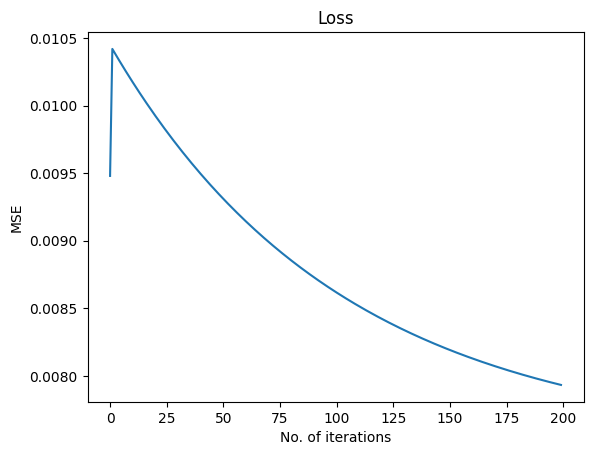

In [97]:
vector, loss, x_list = PGD(X0)
plt.plot(loss, label='Projected Gradient')
plt.title('Loss')
plt.xlabel('No. of iterations')
plt.ylabel('MSE')
#plt.legend()
plt.show()